In [475]:
import sys
import json
from src.loader import SlackDataLoader
import random
import pandas as pd

from matplotlib import pyplot as plt 
import numpy as np
from datetime import datetime



SDL=SlackDataLoader("Data/anonymized")

In [274]:
#who are the top and bottom 10 users
users=SDL.get_users()
channels=SDL.get_channels()

users_by_replay={}
users_by_mention={}
users_by_message={}
users_by_reaction={}

message_by_replay={}
message_by_reaction={}


for user in users:
    users_by_mention[user['id']],users_by_replay[user['id']],users_by_message[user['id']],users_by_reaction[user['id']]=0,0,0,0

In [275]:
#  by reply count
for channel in channels:
    current_channel_messages=json.loads(SDL.get_channel_messages(channel['name']))
    for current_message in current_channel_messages:
        if('reply_count' in current_channel_messages[current_message][0]):
            users_by_replay[current_channel_messages[current_message][0]['user']]+=1

               
               

In [276]:
def top_and_bottom(by):
    by=({k: v for k, v in sorted(by.items(), key=lambda item: item[1],reverse=True)})
    top_10_users_id=list(by)[0:10]
    bottom_10_users_id=list(by)[-10:]
    return [top_10_users_id,bottom_10_users_id]
# def top_and_bottom_message(by):
#     by=({k: v for k, v in sorted(by.items(), key=lambda item: item[1],reverse=True)})
#     top_10_bottom_10_message_id=list(by)[0:10]
#     bottom_10_bottom_10_message_id=list(by)[-10:]
#     return [top_10_bottom_10_message_id,bottom_10_bottom_10_message_id]
    
def display_top_and_bottom_users(top,bottom,by,by_txt):
    print(f"top 10 users by {by_txt} \n ")
    i=1
    for user_id in top:
        print(f"{i},",list(filter(lambda x:x["id"]==user_id,users))[0]['real_name'],f'with {by[user_id]} {by_txt}')
        i+=1
    print(f"Bottom 10 users by {by_txt}")
    i=len(users)
    for user_id in bottom:
        print(f"{i},",list(filter(lambda x:x["id"]==user_id,users))[0]['real_name'],f'with {by[user_id]} {by_txt}')
        i-=1

In [ ]:
# to display who are the top and bottom 10 users by reply count
top_10_users_id,bottom_10_users_id=top_and_bottom(users_by_replay)
display_top_and_bottom_users(top_10_users_id,bottom_10_users_id,users_by_replay,"replay Count")

In [278]:
#  by mention
for channel in channels:
    current_channel_message=json.loads(SDL.get_channel_messages(channel['name']))
    for current_message in current_channel_message:
        users_by_mention[current_channel_message[current_message][0]['user']]+=1
        if('replies' in current_channel_message[current_message][0]):
            for u in current_channel_message[current_message][0]['replies']:
                users_by_mention[u['user']]+=1


In [ ]:
# to display who are the top and bottom 10 users by mention
top_10_users_id,bottom_10_users_id=top_and_bottom(users_by_mention)
display_top_and_bottom_users(top_10_users_id,bottom_10_users_id,users_by_mention,"mention")


In [280]:
# by Message
for channel in channels:
    current_channel_message=json.loads(SDL.get_channel_messages(channel['name']))
    for current_message in current_channel_message:
        users_by_message[current_channel_message[current_message][0]['user']]+=1

In [ ]:
# to display who are the top and bottom 10 users by message
top_10_users_id,bottom_10_users_id=top_and_bottom(users_by_message)
display_top_and_bottom_users(top_10_users_id,bottom_10_users_id,users_by_message,"message")

In [282]:
# by Reaction
for channel in channels:
    current_channel_message=json.loads(SDL.get_channel_messages(channel['name']))
    for current_message in current_channel_message:
        if('replies' in current_channel_message[current_message][0]):
            for u in current_channel_message[current_message][0]['replies']:
                users_by_reaction[u['user']]+=1

In [ ]:
# to display who are the top and bottom 10 users by Reaction
top_10_users_id,bottom_10_users_id=top_and_bottom(users_by_reaction)
display_top_and_bottom_users(top_10_users_id,bottom_10_users_id,users_by_reaction,"Reaction")

In [284]:
# which message are top and bottom 10 message by replies
for channel in channels:
    current_channel_messages=json.loads(SDL.get_channel_messages(channel['name']))
    for current_message in current_channel_messages:
        if('client_msg_id' in current_channel_messages[current_message][0]):
            if("reply_count" in current_channel_messages[current_message][0]):
                  message_by_replay[current_channel_messages[current_message][0]['client_msg_id']]=current_channel_messages[current_message][0]['reply_count']

      


In [317]:
def display_top_and_bottom_message(top,bottom,by,by_txt):
    print(f"top 10 messages by {by_txt}")
    i=1
    for msg_id in top:
        print(i,msg_id,by[msg_id])
        i+=1
    i=1
    print(f"bottom 10 messages by {by_txt}")
    for msg_id in bottom:
        print(i,msg_id,by[msg_id])
        i+=1

    pass

In [ ]:
# by replies
top_10_msg_id,bottom_10_msg_id=top_and_bottom(message_by_replay)
display_top_and_bottom_message(top_10_msg_id,bottom_10_msg_id,message_by_replay,"replies")

In [314]:
# which message are top and bottom 10 message by Reaction message_by_reaction
for channel in channels:
    current_channel_message=json.loads(SDL.get_channel_messages(channel['name']))
    for current_message in current_channel_message:
        if('client_msg_id' in current_channel_message[current_message][0]):
            if('replies' in current_channel_message[current_message][0]):
                message_by_reaction[current_channel_message[current_message][0]['client_msg_id']]=current_channel_message[current_message][0]['reply_count']

            


In [ ]:
top_10_msg_id,bottom_10_users_id=top_and_bottom(message_by_reaction)
display_top_and_bottom_message(top_10_msg_id,bottom_10_msg_id,message_by_reaction,"reaction")
# print(message_by_reaction.values())

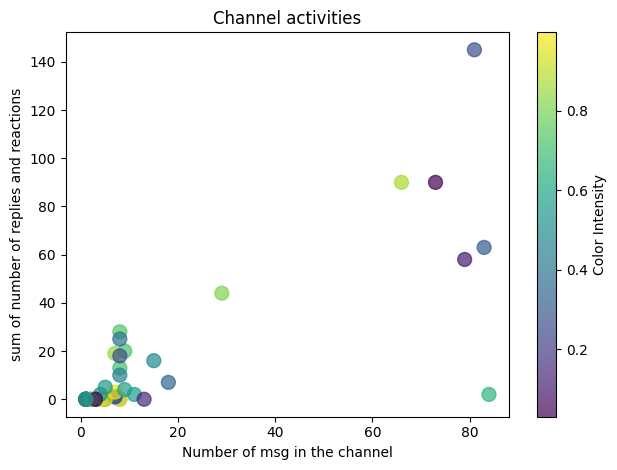

In [490]:
x=[]
y=[]
all_colors=np.random.rand(100)
ci=0
colors=[]
for channel in channels:
    colors.append(all_colors[ci])
    ci+=1
    current_channel_message=json.loads(SDL.get_channel_messages(channel['name']))
    x.append(len(current_channel_message))
    current_channel_total_replies_msg=0
    for current_message in current_channel_message:
        if('replies' in current_channel_message[current_message][0]):
            current_channel_total_replies_msg+=current_channel_message[current_message][0]['reply_count']
    y.append(current_channel_total_replies_msg)
    current_channel_total_replies_msg=0
    



plt.scatter(x,y,c=colors,s=100,alpha=0.7)
plt.title("Channel activities")
plt.xlabel("Number of msg in the channel")
plt.ylabel("sum of number of replies and reactions")
plt.colorbar(label='Color Intensity')
plt.tight_layout()
plt.show()


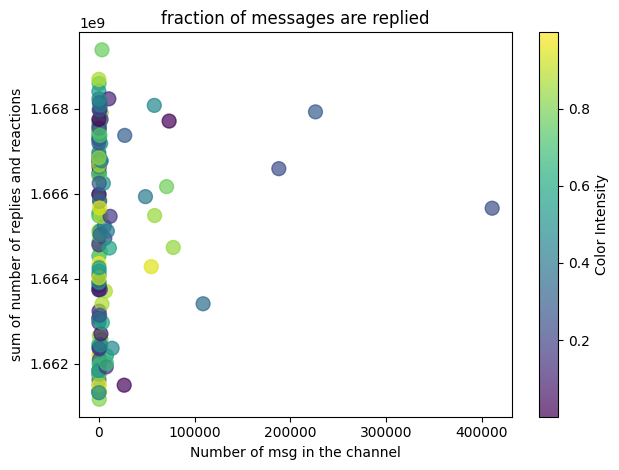

In [493]:
x=[]
y=[]
all_colors=np.random.rand(1000)
ci=0
colors=[]
for channel in channels:
    current_channel_message=json.loads(SDL.get_channel_messages(channel['name']))
    current_channel_total_replies_msg=0
    for current_message in current_channel_message:
        # datetime.datetime.fromtimestamp
        if('replies' in current_channel_message[current_message][0]):
            
            msg_ts=float( current_channel_message[current_message][0]['ts'])
            first_replay_ts=float(current_channel_message[current_message][0]['replies'][0]['ts'])
            tsd=first_replay_ts-msg_ts
            x.append(tsd)
            y.append(msg_ts)
            colors.append(all_colors[ci])
            ci+=1
             
    

plt.scatter(x,y,c=colors,s=100,alpha=0.7)
plt.title("fraction of messages are replied")
plt.xlabel("Number of msg in the channel")
plt.ylabel("sum of number of replies and reactions")
plt.colorbar(label='Color Intensity')
plt.tight_layout()
plt.show()
